#### Metadata

## {background=#dae5ec .center}

:::: columns

::: {.column width="30%"}
![](assets/qr-link-talk.svg){style='margin-top:-10px;'}
:::

::: {.column}
This Talk is a Jupyter Notebook

### [github.com/karmi/talks](https://github.com/karmi/talks/blob/main/wikipedia/wikipedia-semantic-search.ipynb){class=underline}

[https://karmi.cz](https://karmi.cz){class=underline}
:::

::::

## How does a watch work? {background=#36454F .text-white .center}

![](assets/sicario.jpg){.radius}

::: notes
A mechanical and electronic watch both let you “keep an eye on the time”. But inside, they work very differently.
Which is similar to semantic and lexical search.
:::

## What Is Semantic Search? {background=#dc143c .center}

## What Is Semantic Search?

* **Lexical** (_“traditional”_): terms and frequencies

* **Semantic** (_“vector”_): embeddings and similarity

* “Meaning”, not “words”

* The “vocabulary mismatch” problem

* Other _modalities_ (images, sounds, ...)

<small class="pl-1">
→ [txt.cohere.com/what-is-semantic-search](https://txt.cohere.com/what-is-semantic-search)
</small>

::: footer
What Is Semantic Search?
:::

## What Are Text Embeddings? {background=#dc143c .center}

## What Are Text Embeddings?

- Basic mechanism for natural language processing<br>
  <small>(LLMs, machine translation, sentiment analysis, …)</small>

- **Numerical** representations of text content<br>
  <small>(Words, phrases, sentences, paragraphs, …)</small>

- "GPS coordinates" for meaning<br>
  <small>(Hundreds or thousands of dimensions)</small>

- Generated by a pre-trained model

<small class="pl-1">
→ [pinecone.io/learn/vector-embeddings-for-developers](https://www.pinecone.io/learn/vector-embeddings-for-developers/)
</small>

::: footer
What Are Text Embeddings?
:::

::: notes
The embedding model is like text analyzer in Elasticsearch.
:::

![](assets/scr-projector-tensorflow.png){.radius}


::: footer
[projector.tensorflow.org](https://projector.tensorflow.org)
:::

## What is Semantic Similarity? {background=#dc143c .center}

{.center}
-----

$$
\cos(\theta) = \frac{\sum_{i=1}^{n}A_iB_i}{\sqrt{\sum_{i=1}^{n}A_i^2} \cdot \sqrt{\sum_{i=1}^{n}B_i^2}}
$$

{.center background=black background-image="assets/math-lady.jpg" background-transition=fade transition=fade transition-speed=slow}
-----

$$
\cos(\theta) = \frac{\sum_{i=1}^{n}A_iB_i}{\sqrt{\sum_{i=1}^{n}A_i^2} \cdot \sqrt{\sum_{i=1}^{n}B_i^2}}
$$

* Embeddings are just “lists of numbers”

* GPS: <code>[50.0905214, 14.3995431]</code>

* Word: <code>[0.0373, 0.0511, -0.0032, 0.0602, ...]</code>

* Calculate distances

<small class="pl-1">
→ [pinecone.io/learn/vector-similarity/](https://www.pinecone.io/learn/vector-similarity/)
</small>

::: footer
What is Semantic Similarity?
:::

## {background=#718096 .slide-code .slide-code-wide .slide-grey .smaller}

[[ 6  7]
 [ 8  9]
 [ 2 10]]


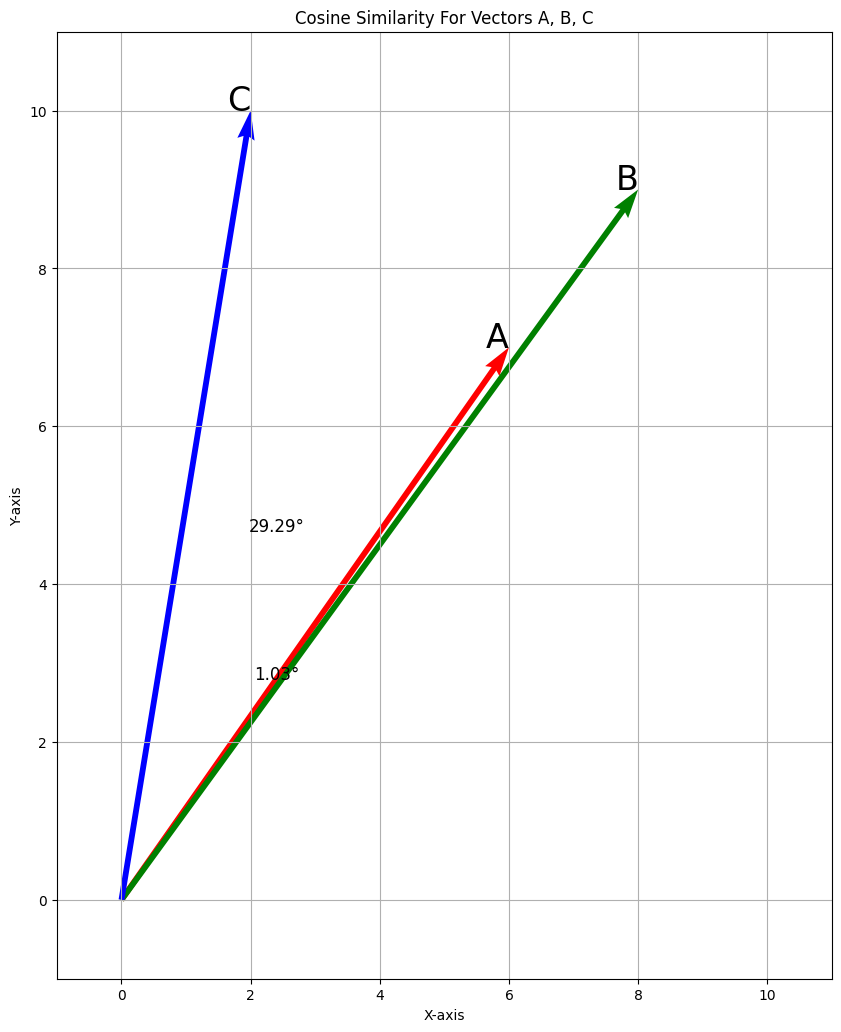

In [1]:
#| output-location: column

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Define three vectors
A = np.array([6,7])
B = np.array([8,9])
C = np.array([2,10])

# Stack vectors into a single matrix
vectors = np.vstack([A, B, C])
print(vectors)

# Calculate cosine similarity matrix
cos_sim_matrix = cosine_similarity(vectors)

# Calculate angles in degrees
theta_AB = np.arccos(cos_sim_matrix[0, 1]) * (180 / np.pi)
theta_AC = np.arccos(cos_sim_matrix[0, 2]) * (180 / np.pi)

# Origin coordinates
origin = np.zeros((3, 2))

# Display the "quiver" chart

plt.figure(figsize=(10, 12.3))
plt.title("Cosine Similarity For Vectors A, B, C")

plt.quiver(origin[:, 0], origin[:, 1], vectors[:, 0], vectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=['r', 'g', 'b'])


plt.xlim(-1, 11)
plt.ylim(-1, 11)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.grid()

plt.text(A[0], A[1], 'A', color='black', fontsize=24, ha='right')
plt.text(B[0], B[1], 'B', color='black', fontsize=24, ha='right')
plt.text(C[0], C[1], 'C', color='black', fontsize=24, ha='right')
plt.text(A[0] / 2.5, A[1] / 2.5, f'{theta_AB:.2f}°', color='black', fontsize=12, ha='center')
plt.text(A[0] / 2.5, A[1] / 1.5, f'{theta_AC:.2f}°', color='black', fontsize=12, ha='center')

plt.show()

## Generating Embeddings {.slide-code}

<!-- [![](https://huggingface.co/front/assets/huggingface_logo-noborder.svg){class="icon" width="40" height="40"} `paraphrase-multilingual-MiniLM-L12-v2`](https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2) -->
[![](https://huggingface.co/front/assets/huggingface_logo-noborder.svg){class="icon" width="40" height="40"} `intfloat/multilingual-e5-base`](https://huggingface.co/intfloat/multilingual-e5-base)

::: aside
[hf.co/spaces/mteb/leaderboard](https://hf.co/spaces/mteb/leaderboard)
:::

In [240]:
#| output: false

from sentence_transformers import SentenceTransformer

MODEL_ID = "intfloat/multilingual-e5-base"
model = SentenceTransformer(MODEL_ID)

In [252]:
word_emb = model.encode("clock")

with np.printoptions(linewidth=100, threshold=100): print(word_emb)
print(word_emb.shape)

[-0.01488969  0.03256331 -0.00374006 ...  0.01093324 -0.03524447  0.03797634]
(768,)


## Generate Embeddings for Multiple Words {.slide-code .smaller}

[`sentence_transformers.SentenceTransformer.encode`](https://www.sbert.net/docs/package_reference/SentenceTransformer.html#sentence_transformers.SentenceTransformer.encode)

In [515]:
QUERY_PREFIX   = "query: "   if "e5" in MODEL_ID else ""
PASSAGE_PREFIX = "passage: " if "e5" in MODEL_ID else ""

In [524]:
import pandas as pd

words = ["cat", "mouse", "house", "kitten", "clock"]

df = pd.DataFrame(
    [  [model.encode(PASSAGE_PREFIX + word)] for word in words ],
    index=words, columns=["embeddings"])

df

,embeddings
cat,"[0.021156617, -0.00069385127, -0.015012221, 0...."
mouse,"[0.0007892736, 0.012299454, -0.0062992857, 0.0..."
house,"[0.016028672, 0.01198161, -0.019900559, 0.0164..."
kitten,"[0.018304918, -0.010472597, -0.0055162413, 0.0..."
clock,"[-0.0146252755, 0.016221017, -0.012604436, 0.0..."


## Compute Cosine Similarity {.slide-code .smaller}

[`sklearn.metrics.pairwise.cosine_similarity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)

[`sklearn.preprocessing.MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [1117]:
#| output-location: column

query = "cat"
query_emb = model.encode(QUERY_PREFIX + query)
similarities = {}

# Compute similarities

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

for word, word_emb in df["embeddings"].items():
    similarities[word] = cosine_similarity(
        [query_emb],
        [word_emb]
      )[0][0]

# Original similarities

scores = list(similarities.values())

# Normalized similarities

scaler = MinMaxScaler()

normalized_scores = \
    scaler.fit_transform(
        np.array(scores).reshape(-1, 1)).flatten()





display(
    pd.DataFrame({
    "Word": [f"{query} ⇔ {k}" for k in similarities.keys()],
    "Similarity": similarities.values(),
  })
  .sort_values(by=["Similarity"], ascending=False)
  .style
    .hide(axis="index")
    .format(precision=4)
    .set_caption("Original")
    .set_table_attributes('class="dataframe small"')
    .bar(subset=['Similarity'], color='#999')
)

display(
  pd.DataFrame({
    "Word": [f"{query} ⇔ {k}" for k in similarities.keys()],
    "Similarity": normalized_scores,
  })
  .sort_values(by=["Similarity"], ascending=False)
  .style
    .hide(axis="index")
    .format(precision=4)
    .set_caption("Normalized")
    .set_table_attributes('class="dataframe small"')
    .bar(subset=['Similarity'], color='#999')
)

Word,Similarity
cat ⇔ cat,0.8910
cat ⇔ kitten,0.8655
cat ⇔ mouse,0.8249
cat ⇔ house,0.8015
cat ⇔ clock,0.7940


Word,Similarity
cat ⇔ cat,1.0000
cat ⇔ kitten,0.7378
cat ⇔ mouse,0.3186
cat ⇔ house,0.0781
cat ⇔ clock,0.0000


<iframe id="word-arithmetics" src="https://karmiq-glove-word-arithmetics.hf.space" width="100%" height="85%" style="padding-top: 50px"></iframe>

::: footer
[huggingface.co/spaces/karmiq/glove-word-arithmetics](https://huggingface.co/spaces/karmiq/glove-word-arithmetics)
:::

## Nearest Neighbors with `scikit-learn` {.slide-code .slide-code-wide .smaller}

In [494]:
#| output-location: column

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

# Initialize the model
nn = NearestNeighbors(n_neighbors=len(df["embeddings"]))

# Store the embeddings for efficient lookup
nn.fit(df["embeddings"].tolist())

# Define the search query
query = "watch"
query_embedding = np.array([model.encode("query: " + query)])

# Compare query vector to every vector in the dataset
distances, indices = nn.kneighbors(query_embedding)

# Normalize the distances to [0-1]
scaler = MinMaxScaler()
normalized_distances = scaler.fit_transform(distances.reshape(-1, 1))

# Display the results
(pd.DataFrame({
    "word": df.index[indices.flatten()],
    "distance": normalized_distances.flatten(),
})



 .style
    .hide(axis="index")
    .format(precision=4)
    .set_table_attributes('class="dataframe align-left"')
    .set_caption(f"Query: {query}")
    .background_gradient(subset=["distance"], cmap="Greys"))

word,distance
clock,0.0000
mouse,0.7504
house,0.8141
cat,1.0000


## {background=#101C3F}

<br><br>
![](assets/logo-elastic-glyph-color.svg){height=300}
<br><br>

::: aside
### You Know, for Search!
:::

## The Workflow {background=#36454F}

1. Pre-process the data
2. Generate embeddings
3. Index embeddings
4. Search the data
5. Evaluate search quality

## The Outcome {background=#36454F}

<iframe id="word-arithmetics" src="http://127.0.0.1:5000/?q=Jak+fungují+hodinky%3F&m=e5-base&t=semantic" width="100%" height="85%"></iframe>

## [![](https://huggingface.co/front/assets/huggingface_logo-noborder.svg){class="icon" width="40" height="40"} `wikimedia/wikipedia`](https://huggingface.co/datasets/wikimedia/wikipedia/viewer/20231101.cs) {.slide-code}

In [10]:
import datasets

ds = datasets.load_dataset("wikimedia/wikipedia", name="20231101.cs", split="train", revision="b04c8d1")
ds

Dataset({
    features: ['id', 'url', 'title', 'text'],
    num_rows: 534044
})

In [11]:
with pd.option_context("display.max_colwidth", 104):
  display(pd.DataFrame.from_dict(ds[1:2])[["title", "text"]])

,title,text
0,Astronomie,"Astronomie, řecky αστρονομία z άστρον (astron) hvězda a νόμος (nomos) zákon, česky též hvězdářství, ..."


## Pre-process the Data

* Assumption: the data is text-based
* Split the text into semantic units (“chunks”)
* Chapters, paragraphs, sentences, ...
* Limited by the model context window

In [1259]:
print(f"Context limit: {model.max_seq_length} tokens")

Context limit: 512 tokens


::: footer
➊ Pre-process the Data
:::

In [14]:
print(ds[1]["text"])

Astronomie, řecky αστρονομία z άστρον (astron) hvězda a νόμος (nomos) zákon, česky též hvězdářství, je věda, která se zabývá jevy za hranicemi zemské atmosféry. Zvláště tedy výzkumem vesmírných těles, jejich soustav, různých dějů ve vesmíru i vesmírem jako celkem.

Historie astronomie

Antika 
Astronomie se podobně jako další vědy začala rozvíjet ve starověku. Na území Babylonie však nebylo k popisu používáno již vynalezené geometrie (grafy). První se z astronomie rozvíjela astrometrie, zabývající se měřením poloh hvězd a planet na obloze. Tato oblast astronomie měla velký význam pro navigaci. Podstatnou částí astrometrie je sférická astronomie sloužící k popisu poloh objektů na nebeské sféře, zavádí souřadnice a popisuje významné křivky a body na nebeské sféře. Pojmy ze sférické astronomie se také používají při měření času.

Další oblastí astronomie, která se rozvinula, byla nebeská mechanika. Zabývá se pohybem těles v gravitačním poli, například planet ve sluneční soustavě. Základem 

## Split Text to Paragraphs {.slide-code}

::: footer
➊ Pre-process the Data
:::

In [15]:
def split_to_paraghraps(text):
  return text.split("\n\n")

In [802]:
for paragraph in split_to_paraghraps(ds[1]["text"]):
  print(paragraph)
  print("━━━━━")

Astronomie, řecky αστρονομία z άστρον (astron) hvězda a νόμος (nomos) zákon, česky též hvězdářství, je věda, která se zabývá jevy za hranicemi zemské atmosféry. Zvláště tedy výzkumem vesmírných těles, jejich soustav, různých dějů ve vesmíru i vesmírem jako celkem.
━━━━━
Historie astronomie
━━━━━
Antika 
Astronomie se podobně jako další vědy začala rozvíjet ve starověku. Na území Babylonie však nebylo k popisu používáno již vynalezené geometrie (grafy). První se z astronomie rozvíjela astrometrie, zabývající se měřením poloh hvězd a planet na obloze. Tato oblast astronomie měla velký význam pro navigaci. Podstatnou částí astrometrie je sférická astronomie sloužící k popisu poloh objektů na nebeské sféře, zavádí souřadnice a popisuje významné křivky a body na nebeské sféře. Pojmy ze sférické astronomie se také používají při měření času.
━━━━━
Další oblastí astronomie, která se rozvinula, byla nebeská mechanika. Zabývá se pohybem těles v gravitačním poli, například planet ve sluneční sous

## Split Paragraphs to Sentences {.slide-code .slide-code-wide .smaller}

::: footer
➊ Pre-process the Data
:::

In [1094]:
#| output-location: column

import re
from corpy.morphodita import Tokenizer

sentence_splitter = Tokenizer("czech")

def split_to_sentences(text):
  RE_PUNCT = re.compile(r'[,:;\.?!“"]+')

  sentences = []

  for part in sentence_splitter.tokenize(text, sents=True):
    sentence = ""
    for i, token in enumerate(part):
      space = "" if RE_PUNCT.match(token) or i == 0 else " "
      sentence += space + token
    sentences.append(sentence)

  return sentences

for paragraph in split_to_paraghraps(ds[1]["text"]):
  for sentence in split_to_sentences(paragraph):
    print("✢", sentence)
  print("━━━━━")

✢ Astronomie, řecky αστρονομία z άστρον ( astron ) hvězda a νόμος ( nomos ) zákon, česky též hvězdářství, je věda, která se zabývá jevy za hranicemi zemské atmosféry.
✢ Zvláště tedy výzkumem vesmírných těles, jejich soustav, různých dějů ve vesmíru i vesmírem jako celkem.
━━━━━
✢ Historie astronomie
━━━━━
✢ Antika Astronomie se podobně jako další vědy začala rozvíjet ve starověku.
✢ Na území Babylonie však nebylo k popisu používáno již vynalezené geometrie ( grafy ).
✢ První se z astronomie rozvíjela astrometrie, zabývající se měřením poloh hvězd a planet na obloze.
✢ Tato oblast astronomie měla velký význam pro navigaci.
✢ Podstatnou částí astrometrie je sférická astronomie sloužící k popisu poloh objektů na nebeské sféře, zavádí souřadnice a popisuje významné křivky a body na nebeské sféře.
✢ Pojmy ze sférické astronomie se také používají při měření času.
━━━━━
✢ Další oblastí astronomie, která se rozvinula, byla nebeská mechanika.
✢ Zabývá se pohybem těles v gravitačním poli, napřík

## Split Page into Chunks with Context Window Limit {.slide-code .smaller}

::: footer
➊ Pre-process the Data
:::

In [1260]:
import torch

prefix_token_count = len(model.tokenizer(PASSAGE_PREFIX)["input_ids"])
max_tokens = model.max_seq_length - model.tokenizer.num_special_tokens_to_add() - prefix_token_count

device = "cpu"
if torch.backends.mps.is_available():
  device = "mps"
if torch.cuda.is_available():
  device = "cuda"

model = model.to(device)

print(f"Using model [{MODEL_ID}] on [{model.device}] with maximum of [{max_tokens}] tokens")

Using model [intfloat/multilingual-e5-base] on [mps:0] with maximum of [506] tokens


## Split Page into Chunks with Context Window Limit {.slide-code .smaller}

::: footer
➊ Pre-process the Data
:::

In [1261]:
import transformers
transformers.logging.set_verbosity_error() # Prevent warnings for context window overflow

def generate_chunks(batch):
    output = {"chunks": []}

    for page in batch["text"]:
        page_chunks = []
        current_chunk = ""

        for paragraph in split_to_paraghraps(page):
            sentences = split_to_sentences(paragraph)

            for sentence in sentences:
                candidate_chunk = current_chunk + " " + sentence if current_chunk else sentence
                candidate_chunk_tokenized = model.tokenizer(PASSAGE_PREFIX + candidate_chunk, truncation=False)

                if len(candidate_chunk_tokenized["input_ids"]) <= max_tokens:
                    current_chunk = candidate_chunk
                else:
                    page_chunks.append(current_chunk)
                    current_chunk = sentence

        if current_chunk: # Add the last chunk if it's not empty
            page_chunks.append(current_chunk)

        output["chunks"].append(page_chunks)

    return output

## Split Text into Chunks with Context Window Limit {.slide-code .smaller}

::: footer
➊ Pre-process the Data
:::

In [1262]:
ds_sample = ds.select(range(1000))

ds_chunked = ds_sample.map(
    generate_chunks,
    batched=True,
    batch_size=1_000,
    num_proc=16,
    desc="Chunks",
    load_from_cache_file=False) # Disable caching

Chunks (num_proc=16):   0%|          | 0/1000 [00:00<?, ? examples/s]

In [1263]:
for chunk in ds_chunked[1]["chunks"]:
  print(chunk)
  print("━━━━━")

Astronomie, řecky αστρονομία z άστρον ( astron ) hvězda a νόμος ( nomos ) zákon, česky též hvězdářství, je věda, která se zabývá jevy za hranicemi zemské atmosféry. Zvláště tedy výzkumem vesmírných těles, jejich soustav, různých dějů ve vesmíru i vesmírem jako celkem. Historie astronomie Antika Astronomie se podobně jako další vědy začala rozvíjet ve starověku. Na území Babylonie však nebylo k popisu používáno již vynalezené geometrie ( grafy ). První se z astronomie rozvíjela astrometrie, zabývající se měřením poloh hvězd a planet na obloze. Tato oblast astronomie měla velký význam pro navigaci. Podstatnou částí astrometrie je sférická astronomie sloužící k popisu poloh objektů na nebeské sféře, zavádí souřadnice a popisuje významné křivky a body na nebeské sféře. Pojmy ze sférické astronomie se také používají při měření času. Další oblastí astronomie, která se rozvinula, byla nebeská mechanika. Zabývá se pohybem těles v gravitačním poli, například planet ve sluneční soustavě. Základe

## Inspect the Data {.slide-code .smaller}

::: footer
➊ Pre-process the Data
:::

      Number of chunks: mean=6.20 ± 9.00, min=1, max=83
      Chunks over limit: 8.76%, max=725


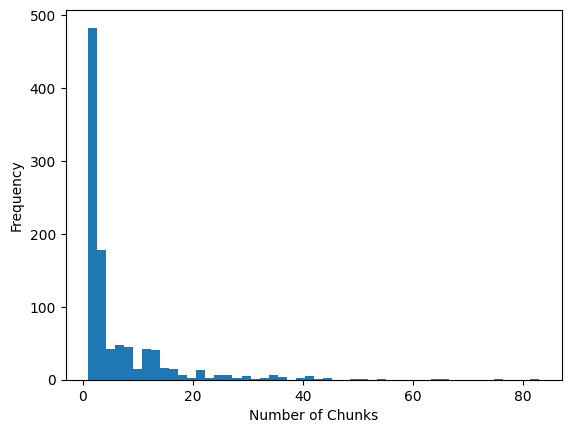

In [1393]:
#| output-location: column

num_tokens = np.array([
  len(model.tokenizer(PASSAGE_PREFIX + chunk, truncation=False)['input_ids'])
  for page_chunks in ds_chunked["chunks"]
  for chunk in page_chunks
])

num_chunks = [
  len(page_chunks) for page_chunks in ds_chunked["chunks"]
]

print("      Number of chunks:",
      f"mean={np.mean(num_chunks):.2f}",
      f"± {np.std(num_chunks):.2f},",
      f"min={np.min(num_chunks)},",
      f"max={np.max(num_chunks)}")

print("      Chunks over limit:",
      f"{(num_tokens > model.max_seq_length).sum() / sum(num_chunks) * 100:.2f}%,",
      f"max={num_tokens.max()}")

import matplotlib.pyplot as plt

plt.hist(num_chunks, bins=50)
plt.xlabel('Number of Chunks')
plt.ylabel('Frequency')
plt.show()

In [1391]:
# Display first 3 chunks over context limit

for chunk in [
  chunk
  for chunks in ds_chunked["chunks"]
  for chunk in chunks
  if len(model.tokenizer(PASSAGE_PREFIX + chunk, truncation=False)['input_ids']) > model.max_seq_length][:3]:
    print(chunk)
    print("━━━━━")

Podřízené a související vědní obory Pod biologii tedy můžeme zařadit, nebo nalézt její úzkou spojitost s následujícími vědními obory: agrobiologie – věda, která využívá biologické zákonitosti v zemědělství anatomie – studium forem a funkcí u rostlin, zvířat a jiných organismů, nebo specificky u lidí bionomie – je komplexní studium organismu a jeho vztah k jeho prostředí biofyzika – hraniční obor, který zkoumá biologické objekty a problémy fyzikálními metodami biogeografie – je nauka o rozdělení biodiverzity v prostoru a čase biochemie – je vědní disciplína na pomezí biologie a chemie biologická systematika – ( též taxonomie ) vědecky zkoumá druhy a druhovou diverzitu organismů a všechny vztahy mezi nimi bionika – je hraniční obor, systematicky zaměřený na uplatňování poznatků ze studia živých organismů a jejich struktur při vývoji nových technologií biostatistika – obor využívající metody matematické statistiky při studiu proměnlivosti živých organizmů botanika – ( též rostlinopis, fyt

## ➋ Generate the Embeddings

* Generate embeddings for each chunk
* Computationally expensive, best suited for GPU
* Performance: Hardware, batch size

## Helpers: Decorator for Measuring Duration {.slide-code .smaller}

::: footer
➋ Generate the Embeddings
:::

In [60]:
import time
import functools

def record_duration(func):
  """Measures the duration of function execution and stores it in internal attribute"""

  func._durations = []

  @functools.wraps(func)
  def wrapper(batch, **kwargs):
    start = time.perf_counter()
    result = func(batch, **kwargs)
    duration = time.perf_counter() - start

    func._durations.append(duration)

    return result

  return wrapper

## Helpers: Decorator for Recording Metrics {.slide-code .smaller}

::: footer
➋ Generate the Embeddings
:::

In [61]:
import time
import humanize

def record_metrics(func):
  """Stores information and metrics about function execution and stores it in a dataframe"""

  @functools.wraps(func)
  def wrapper(ds, fn, map_batch_size, encode_batch_size, num_total):
    num_items = len(ds)
    start = time.perf_counter()

    try:
      return func(ds, fn, map_batch_size, encode_batch_size, num_total)
    finally:
      total_duration = time.perf_counter() - start
      throughput = num_items / total_duration

      if fn._durations:
        batch_duration_min = np.min(fn._durations)
        batch_duration_max = np.max(fn._durations)
        batch_duration_mean = np.mean(fn._durations)

        print(
          f"Batch durations:",
          f"min={batch_duration_min:.2f}s,", f"max={batch_duration_max:.2f}s,", f"mean={batch_duration_mean:.2f}s")
        print(f"Duration: {humanize.precisedelta(total_duration, minimum_unit='seconds', format='%d')},",
              f"throughput: {throughput:.2f} pages/sec,",
              f"estimated running time: {humanize.precisedelta(num_total/map_batch_size*batch_duration_mean, minimum_unit='minutes', format='%d')}")

  return wrapper

## Helpers: Wrapper for Calling The Embedding Function {.slide-code .smaller}

::: footer
➋ Generate the Embeddings
:::

In [65]:
@record_metrics
def generate_embeddings(ds, fn, map_batch_size=100, encode_batch_size=1000, num_total=len(ds)):
  num_items = len(ds)
  start = time.perf_counter()

  info = (
    fn.__doc__ + f" | Device: {device.upper()}" + "\n" +
    f"Pages: {num_items:,d} | Batch size: {map_batch_size:,d} | Encode batch_size: {encode_batch_size:,d}")

  try:
    return ds.map(
      fn,
      fn_kwargs={"encode_batch_size":encode_batch_size},
      batched=True,
      batch_size=map_batch_size,
      desc="Embeddings",
      load_from_cache_file=False)
  except KeyboardInterrupt as e:
    print(f"[!] Interrupted after {time.perf_counter() - start:.2f}sec.")
  except torch.cuda.OutOfMemoryError as e:
    print(f"[!] {e.__class__.__name__}: {'. '.join(str(e).split('. ')[0:3]) + '.'}")
  finally:
    print(info)

## 1. Generate Embeddings Sequentialy {.slide-code .smaller}

::: footer
➋ Generate the Embeddings
:::

In [70]:
@record_duration
def create_embeddings_sequential(batch, **kwargs):
  """Strategy: sequential, one call per chunk"""

  output = {"embeddings": []}

  for page_chunks in batch["chunks"]:
    page_embeddings = []
    for chunk in page_chunks:
      chunk_embeddings = model.encode(chunk, batch_size=kwargs.get("encode_batch_size", 1000))
      page_embeddings.append(chunk_embeddings)
    output["embeddings"].append(page_embeddings)

  return output

In [71]:
ds_emb = generate_embeddings(ds_chunked, create_embeddings_sequential, map_batch_size=100, encode_batch_size=1000, num_total=len(ds))

Embeddings:   0%|          | 0/1000 [00:00<?, ? examples/s]

Strategy: sequential, one call per chunk | Device: MPS
Pages: 1,000 | Batch size: 100 | Encode batch_size: 1,000
Batch durations: min=22.31s, max=50.36s, mean=38.52s
Duration: 6 minutes and 32 seconds, throughput: 2.55 pages/sec, estimated running time: 2 days, 9 hours and 8 minutes


## 2. Generate Embeddings in Parallel for All Page Chunks {.slide-code .smaller}

::: footer
➋ Generate the Embeddings
:::

In [72]:
@record_duration
def create_embeddings_parallel_page(batch, **kwargs):
  """Strategy: parallel, one call per page"""

  output = {"embeddings": []}

  for page_chunks in batch["chunks"]:
    page_embeddings = model.encode(page_chunks, batch_size=kwargs.get("encode_batch_size", 1000))
    output["embeddings"].append(page_embeddings)

  return output

In [73]:
ds_emb = generate_embeddings(ds_chunked, create_embeddings_parallel_page, map_batch_size=100, encode_batch_size=1000, num_total=len(ds))

Embeddings:   0%|          | 0/1000 [00:00<?, ? examples/s]

Strategy: parallel, one call per page | Device: MPS
Pages: 1,000 | Batch size: 100 | Encode batch_size: 1,000
Batch durations: min=14.07s, max=24.34s, mean=18.62s
Duration: 3 minutes and 14 seconds, throughput: 5.15 pages/sec, estimated running time: 1 day, 3 hours and 37 minutes


## 3. Generate Embeddings in Parallel for the Whole Batch {.slide-code .smaller}

::: footer
➋ Generate the Embeddings
:::

In [74]:
@record_duration
def create_embeddings_parallel_batch(batch, **kwargs):
    """Strategy: one call per batch, with restructuring"""

    output = {"embeddings": []}

    # Flatten all chunks in batch into a single list
    flat_chunks = [chunk for page_chunks in batch["chunks"] for chunk in page_chunks]
    flat_embeddings = model.encode(flat_chunks, batch_size=kwargs.get("encode_batch_size", 1000))

    # Re-assemble the structure of the embeddings to match the input batch of pages
    i = 0  # Current position in the flat_embeddings list
    for page_chunks in batch["chunks"]:
        num_chunks = len(page_chunks)  # Number of chunks for current page
        # Slice the embeddings from the flat_embeddings list
        page_embeddings = flat_embeddings[i : i + num_chunks]
        output["embeddings"].append(page_embeddings)
        i += num_chunks  # Update the index position

    return output

In [75]:
ds_emb = generate_embeddings(ds_chunked, create_embeddings_parallel_batch, map_batch_size=100, encode_batch_size=1000, num_total=len(ds))

Embeddings:   0%|          | 0/1000 [00:00<?, ? examples/s]

Strategy: one call per batch, with restructuring | Device: MPS
Pages: 1,000 | Batch size: 100 | Encode batch_size: 1,000
Batch durations: min=2.76s, max=6.18s, mean=4.47s
Duration: 52 seconds, throughput: 19.00 pages/sec, estimated running time: 6 hours and 38 minutes


## Throughput: Pages Per Second {.slide-code .smaller}

Apple M3 Max, NVIDIA GeForce RTX 4090, NVIDIA A100 80GB

::: aside
Total running time for complete dataset on NVIDIA A100 80GB ≈ 2 hours

OpenAI embeddings cost ≈ $12
:::

::: footer
➋ Generate the Embeddings
:::

In [82]:
#| output-location: column

import pandas as pd
import altair as alt

metrics_df = pd.read_csv("data/metrics.csv")

alt.Chart(metrics_df, width=200, padding=10).mark_bar(
  cornerRadiusEnd=2,
  binSpacing=2,
).encode(
  x=alt.X('throughput:Q', title=None, axis={'orient':'top'}),
  y=alt.Y('implementation:N', title=None),
  yOffset=alt.YOffset('num_pages:N'),

  row=alt.Row('device_name:N', title=None,
              sort=['a100', 'rtx-4090', 'm3-max']),

  color=alt.Color('num_pages:N',
                  scale=alt.Scale(scheme='set1'),
                  title=None),

  tooltip=[
    'device_name',
    'implementation',
    'num_pages',
    'throughput'])

alt.Chart(...)

In [1227]:
# OpenAI Embeddings Cost
# text-embedding-3-small: $0.00002 / 1K tokens

import numpy as np
import tiktoken

encoding = tiktoken.get_encoding("cl100k_base")

# https://platform.openai.com/docs/guides/embeddings/how-can-i-tell-how-many-tokens-a-string-has-before-i-embed-it
#
def num_tokens_from_string(string: str) -> int:
    return len(encoding.encode(string))

def compute_number_of_tokens(batch, **kwargs):
    output = {"num_tokens": []}
    for page in batch["text"]:
        output['num_tokens'].append(num_tokens_from_string(page))
    return output

ds_num_tokens = ds.map(
    compute_number_of_tokens,
    batched=True,
    batch_size=1000,
    num_proc=16,
    desc="Cost")

num_total_tokens = np.sum(ds_num_tokens['num_tokens'])
total_cost = num_total_tokens / 1000 * 0.00002

print(f"Total tokens: {num_total_tokens:,}, total cost: ${total_cost:.2f}")

Total tokens: 609,332,648, total cost: $12.19


## Load the Ready-Made Dataset

[![](https://huggingface.co/front/assets/huggingface_logo-noborder.svg){class="icon" width="40" height="40"} `karmiq/wikipedia-embeddings-cs-e5-base`](https://huggingface.co/datasets/karmiq/karmiq/wikipedia-embeddings-cs-e5-base)

::: footer
➋ Generate the Embeddings
:::

In [532]:
DATASET_ID = "karmiq/wikipedia-embeddings-cs-e5-base"

ds_emb = datasets.load_dataset(DATASET_ID, split="train")
ds_emb

Dataset({
    features: ['id', 'url', 'title', 'chunks', 'embeddings'],
    num_rows: 534044
})

## ➌ Index the Data

* Using the Bulk API
* Performance: Dataset iteration
* Performance: JSON serialization
* Performance: Number of segments

## Setup Indexing {.slide-code .smaller}

::: footer
➌ Index the Data
:::

In [534]:
import os
from urllib.parse import urlparse

from tqdm.notebook import tqdm
from elasticsearch import Elasticsearch

ELASTICSEARCH_URL = os.getenv("ELASTICSEARCH_URL", "http://localhost:9200")

INDEX_NAME = "wikipedia-search-v999"
INDEX_ALIAS = f"wikipedia-search-sample"

es = Elasticsearch(hosts=ELASTICSEARCH_URL, request_timeout=300)

print(f"Using model [{MODEL_ID}] on [{model.device}] "
      f"with [{model.get_sentence_embedding_dimension()}] dimensions ")

print(f"Using dataset [{DATASET_ID}] ({humanize.naturalsize(ds_emb.size_in_bytes)}) with {ds_emb.num_rows:,} rows")

print(f"Connected to Elasticsearch at [{urlparse(ELASTICSEARCH_URL).hostname}] "
      f"with index [{INDEX_NAME}] and alias [{INDEX_ALIAS}]")

Using model [intfloat/multilingual-e5-base] on [mps:0] with [768] dimensions 
Using dataset [karmiq/wikipedia-embeddings-cs-e5-base] (9.9 GB) with 534,044 rows
Connected to Elasticsearch at [localhost] with index [wikipedia-search-v999] and alias [wikipedia-search-sample]


## Index Mappings {.slide-code .smaller}

::: footer
➌ Index the Data
:::

In [535]:
mapping = {
  "properties": {
    "title": { "type": "keyword" },
    "url":   { "type": "keyword", "index": False },

    "parts": {
      "type": "nested",
      "properties": {
        "chunk": {
            "type": "text",
            "analyzer": "czech",
        },
        "embedding": {
            "type": "dense_vector",
            "dims": model.get_sentence_embedding_dimension(),
            "index": True,
            "similarity": "cosine",
            "meta": { "model": MODEL_ID },
        },
      },
    },
  },
  "_source": {
    "excludes": ["parts.embedding"]
  }
}

## Create the Index {.slide-code .smaller}

::: footer
➌ Index the Data
:::

In [536]:
skip_indexing = es.indices.exists(index=INDEX_NAME)

if skip_indexing:
  print(f"Skipping index creation for [{INDEX_NAME}]")
else:
  if es.indices.exists_alias(name=INDEX_ALIAS):
    es.indices.delete_alias(name=INDEX_ALIAS, index="*")
  es.indices.create(
      index=INDEX_NAME,
      mappings=mapping,
      aliases={INDEX_ALIAS:{}},
  )
  print(f"Created index [{INDEX_NAME}] with alias [{INDEX_ALIAS}]")

Created index [wikipedia-search-v999] with alias [wikipedia-search-sample]


## Performance: Dataset Iteration {.slide-code .smaller}

<https://huggingface.co/docs/datasets/about_arrow#performance>

<https://discuss.huggingface.co/t/slow-iteration-speed-with-and-without-keep-in-memory-true/33587/2>

::: notes
> To read tokenized text from Arrow, the bottleneck is often the conversion of the tokenized Arrow data to pythons lists.
:::

::: footer
➌ Index the Data
:::

In [121]:
%%timeit -r 3 -n 3

for row in ds_emb.select(range(100_000)):
    _ = row["id"]
    _ = row["embeddings"]

21.9 s ± 57.2 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [120]:
%%timeit -r 3 -n 3

for batch in ds_emb.select(range(100_000)).with_format("numpy").iter(1000):
    for i, item in enumerate(batch["id"]):
      _ = item
      _ = batch["embeddings"][i].tolist()

2.98 s ± 13.1 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


## Performance: NumPy JSON Serialization {.slide-code .smaller}

<https://github.com/ijl/orjson#numpy>

::: footer
➌ Index the Data
:::

In [108]:
import numpy, json, orjson

a = numpy.arange(500)

%timeit -r 100 -n 10_000 json.dumps(a.tolist())
%timeit -r 100 -n 10_000 orjson.dumps(a, option=orjson.OPT_SERIALIZE_NUMPY)

21.3 µs ± 303 ns per loop (mean ± std. dev. of 100 runs, 10,000 loops each)
2.22 µs ± 175 ns per loop (mean ± std. dev. of 100 runs, 10,000 loops each)


## Custom JSON Serializer for the Elasticsearch Client {.slide-code .smaller}

::: footer
➌ Index the Data
:::

In [ ]:
%pip install -q orjson

In [537]:
import orjson
from elasticsearch import JSONSerializer

class OrjsonSerializer(JSONSerializer):
    def json_loads(self, data):
        return orjson.loads(data)

    def json_dumps(self, data):
        return orjson.dumps(data, option=orjson.OPT_SERIALIZE_NUMPY)

es = Elasticsearch(
    hosts=ELASTICSEARCH_URL, request_timeout=300, serializer=OrjsonSerializer()
)

## Batch Generator {.slide-code .smaller}

::: footer
➌ Index the Data
:::

In [538]:
def doc_generator(data, batch_size=1000):
  for batch in data.with_format("numpy").iter(batch_size):
    for i, id in enumerate(batch["id"]):
      output = {"id": id}
      output["title"] = batch["title"][i]
      output["url"] = batch["url"][i]
      output["parts"] = [
          { "chunk": chunk, "embedding": embedding }
          for chunk, embedding in zip(batch["chunks"][i], batch["embeddings"][i])
      ]
      yield output

# with np.printoptions(linewidth=120, threshold=100):
#   display(list(doc_generator(ds_emb.select(range(1,2)))))

## Batch Indexing {.slide-code .smaller}

::: footer
➌ Index the Data
:::

In [539]:
from elasticsearch.helpers import parallel_bulk

ds_to_index = ds_emb.select(range(100_000))

if skip_indexing:
  print(f"Skipping indexing for [{INDEX_NAME}]")
else:
  num_threads, batch_size = 8, 1_000
  num_indexed, num_failed = 0, 0
  progress = tqdm(total=ds_to_index.num_rows, unit="doc", desc="Indexing")
  start = time.perf_counter()

  try:
    es.indices.put_settings(index=INDEX_NAME, settings={"index.refresh_interval": "-1"})

    for ok, info in parallel_bulk(
        es,
        index=INDEX_NAME,
        actions=doc_generator(ds_to_index),
        thread_count=num_threads,
        chunk_size=batch_size,
        raise_on_error=False,
    ):
        if ok:
            num_indexed += 1
        else:
            num_failed += 1
            print(f"ERROR {info['index']['status']}: "
                  f"{info['index']['error']['type']}: {info['index']['error']['caused_by']['type']}: "
                  f"{info['index']['error']['caused_by']['reason'][:250]}")

        progress.update(1)
  except KeyboardInterrupt:
    print(f"Indexing interrupted by the user after [{num_indexed:,d}] documents")
  finally:
    es.indices.refresh(index=INDEX_NAME)
    es.indices.put_settings(index=INDEX_NAME, settings={"index.refresh_interval": None})
    progress.close()

  duration = time.perf_counter() - start
  index_stats = es.indices.stats(index=INDEX_NAME, metric='store', human=True)

  print(
    f"Indexed [{num_indexed:,d}] documents with [{num_failed:,d}] errors",
    f"in {humanize.precisedelta(duration, minimum_unit='seconds', format='%d')},",
    f"throughput: {(num_indexed//duration):,} doc/sec,",
    f"disk size: {index_stats['_all']['primaries']['store']['size']}")

Indexing:   0%|          | 0/100000 [00:00<?, ?doc/s]

Indexed [100,000] documents with [0] errors in 33 seconds, throughput: 2,945.0 doc/sec, disk size: 3.9gb


## Optimize the Index {.slide-code .smaller}

::: aside
> If you force merge to one segment, the kNN search only need to check a single, all-inclusive HNSW graph.
>
> **We recommend only force merging a read-only index (meaning the index is no longer receiving writes)**
>
> — <https://www.elastic.co/guide/en/elasticsearch/reference/current/tune-knn-search.html#_force_merge_to_one_segment>
:::

::: footer
➌ Index the Data
:::

In [540]:
#| output-location: column

print(es.cat.segments(
  index=INDEX_NAME, v=True,
  h=["index", "shard", "docs.count", "size"]))

index                 shard docs.count    size
wikipedia-search-v999 0          23640 220.1mb
wikipedia-search-v999 0          21735 207.6mb
wikipedia-search-v999 0          13197 128.9mb
wikipedia-search-v999 0          15927 155.2mb
wikipedia-search-v999 0          10883 106.4mb
wikipedia-search-v999 0          14310 140.4mb
wikipedia-search-v999 0           9435  92.7mb
wikipedia-search-v999 0           6045  60.9mb
wikipedia-search-v999 0           2265  21.8mb
wikipedia-search-v999 0           1590  15.3mb
wikipedia-search-v999 0           2854  25.9mb
wikipedia-search-v999 0           2112  20.3mb
wikipedia-search-v999 0           3038  26.3mb
wikipedia-search-v999 0           2468  22.7mb
wikipedia-search-v999 0           1710  16.3mb
wikipedia-search-v999 0           1349  13.5mb
wikipedia-search-v999 0          14934 124.8mb
wikipedia-search-v999 0          12713   108mb
wikipedia-search-v999 0          13954 119.4mb
wikipedia-search-v999 0           9180  79.5mb
wikipedia-sea

## Optimize the Index {.slide-code .smaller}

::: footer
➌ Index the Data
:::

In [541]:
task_id = es.indices.forcemerge(index=INDEX_NAME, max_num_segments=1, wait_for_completion=False)['task']

In [543]:
task = es.tasks.get(task_id=task_id)

print(
  f"[{task_id}] {'Completed in' if task['completed'] else 'Running for'}",
  f"{task['task']['running_time_in_nanos']/6e+10:.2f} minutes")

[6_7-709IT3GjbUs9kfWYsA:222682] Completed in 3.29 minutes


In [544]:
print(es.cat.segments(index=INDEX_NAME, v=True, h=["index", "shard", "docs.count", "size"]))

index                 shard docs.count  size
wikipedia-search-v999 0         413205 1.6gb



## ➍ Search the Data

* Compare lexical and semantic search
* Performance: Inference on CPU

In [564]:
INDEX_ALIAS = "wikipedia-search-base"

In [1121]:
MODEL_ID, model.device

('intfloat/multilingual-e5-base', device(type='mps', index=0))

## Lexical Search {.slide-code .smaller}

::: footer
➍ Search the Data
:::

In [585]:
def search_lexical(client, query, size=100):
  return client.search(
    index=INDEX_ALIAS,
    query={
      "nested": {
        "path": "parts",
        "query": {
          "match": {
            "parts.chunk": query,
          },
        },
        "inner_hits": {
          "_source": {"includes": "parts.chunk"},
          "size": 5,
        },
      },
    },
    size=size,
    sort=["_score", "_doc"],
    _source_excludes=["parts"])

## Semantic Search {.slide-code .smaller}

::: footer
➍ Search the Data
:::

In [1095]:
def search_semantic(client, model, query, size=100):
    if "e5" in MODEL_ID: query = f"query: {query}"
    return client.search(
        index=INDEX_ALIAS,
        query={
           "nested": {
              "path": "parts",
              "query": {
                "knn": {
                  "field": "parts.embedding",
                  "query_vector": model.encode(query),
                  "num_candidates": 1000,
                }
              },
              "inner_hits": {
                "_source": {"includes": "parts.chunk"},
                "size": 5, # Currently returns only 1 // https://github.com/elastic/elasticsearch/pull/104006
              },
           }
        },
        size=size,
        sort=["_score", "_doc"],
        _source_excludes=["parts"])

## Search And Display Results {.slide-code .smaller}

::: footer
➍ Search the Data
:::

In [1099]:
import textwrap

def search(type_, query, model=None, size=15):
  if type_ == "lexical":
     return display_results(query, type_, search_lexical(es, query, size=size))
  elif type_ == "semantic":
     return display_results(query, type_, search_semantic(es, model, query, size=size))
  else:
     raise ValueError(f"Unexpected search type: {type_}")

def display_results(query, typ, results):
  print(f"\n{len(results['hits']['hits'])} {typ} results for «{query}» ﹙{results['took']:,}ms﹚\n")

  for i, hit in enumerate(results["hits"]["hits"], start=1):
      print(f"{i:2d}. {hit['_source']['title']}",
            f" [score={hit['_score']:0.4f}]",
            "\n", "─" * 100, sep="")

      for inner_hit in hit["inner_hits"]["parts"]["hits"]["hits"]:
        print(
            f"{textwrap.shorten(inner_hit['_source']['chunk'], width=250, placeholder=' …')}",
            end=" ")
      print("\n")

## Lexical Search {.slide-code .smaller}

::: footer
➍ Search the Data
:::

In [1100]:
search("lexical", "Co je to staroměstský orloj?")


15 lexical results for «Co je to staroměstský orloj?» ﹙10ms﹚

 1. Kadaňský orloj [score=25.1477]
────────────────────────────────────────────────────────────────────────────────────────────────────
Kadaňský orloj je umělecké dílo v Kadani na Nábřeží Maxipsa Fíka v prostoru pod Kadaňským hradem. Jedná se o kovovou repliku původního hodinového stroje pražského staroměstského orloje nazvanou „ Pocta Mikulášovi z Kadaně“. Autorem mohutné kované … 

 2. Jakub Čech (hodinář) [score=23.6815]
────────────────────────────────────────────────────────────────────────────────────────────────────
Jakub Čech, též Jacob Zech, Czech a Zähen ( † 1540 Praha ) byl český hodinář a orlojník Staroměstského orloje. Život Řemeslu se naučil u Jana z Růže ( mistra Hanuše, snad vlastního otce ) a po něm od roku 1497 vykonával funkci orlojníka … 

 3. Pohádkový orloj v Ostravě [score=23.1809]
────────────────────────────────────────────────────────────────────────────────────────────────────
Pohádkový orloj v Os

## Semantic Search {.slide-code .smaller}

::: footer
➍ Search the Data
:::

In [1101]:
search("semantic", "Co je to staroměstský orloj?", model)


15 semantic results for «Co je to staroměstský orloj?» ﹙36ms﹚

 1. Orloj [score=0.9310]
────────────────────────────────────────────────────────────────────────────────────────────────────
Orloj ( z lat. horologium, hodiny, a ital. orologio ) jsou obvykle věžní hodiny, které kromě času ukazují další údaje, například polohu Slunce a Měsíce na obloze, případně fázi Měsíce, polohy dalších planet, sluneční čas a další. V určitém smyslu … Významné historické orloje Itálie – Benátky, Brescia, Clusone, Cremona, Modena, Messina, Padova, Německo – Heilbronn, Rostock, Lübeck, Münster, Mnichov, Norimberk, Rostock, Stralsund Francie – Beauvais, Besançon, Bourges, Lyon, Ploërmel, Rouen, … Byl zkonstruován v roce 1410 a dále upravován a rozšiřován, mj. jeho domnělým tvůrcem, orlojníkem mistrem Hanušem. Skutečného autora orloje, Mikuláše z Kadaně, připomíná v jeho rodišti nefunkční replika astronomické části orloje. Jediným … 

 2. Staroměstský orloj [score=0.9272]
──────────────────────────────────

## Lexical Search {.slide-code .smaller}

::: footer
➍ Search the Data
:::

In [1102]:
search("lexical", "velké staré hodiny pro turisty v Praze")


15 lexical results for «velké staré hodiny pro turisty v Praze» ﹙44ms﹚

 1. Pražský okruh (rozcestník) [score=16.6882]
────────────────────────────────────────────────────────────────────────────────────────────────────
Pražský okruh označuje objízdné trasy kolem Prahy: Pražský okruh – Dálnice D 0, původně R 1, vnější obchvat města Městský okruh ( Praha ) – vnitroměstský okruh, jehož součástí jsou velké tunelové komplexy a Jižní spojka Staré okruhy z 80. let 20. … 

 2. Chata Kamzík [score=15.9089]
────────────────────────────────────────────────────────────────────────────────────────────────────
Chata Kamzík ( ), ( ), ( ) byla chata, která stála do roku 1980 na Starolesnianskej polaně nedaleko Hrebienka ve Vysokých Tatrách v nadmořské výšce 1295 m. Historie Ján Juraj Rainer, nájemce Starého Smokovce, byl první, kdo objevil výhody … 

 3. Bregarjevo zavetišče na planini Viševnik [score=15.6894]
──────────────────────────────────────────────────────────────────────────────────────────

## Semantic Search {.slide-code .smaller}

::: footer
➍ Search the Data
:::

In [1103]:
search("semantic", "velké staré hodiny pro turisty v Praze", model)


15 semantic results for «velké staré hodiny pro turisty v Praze» ﹙541ms﹚

 1. Veřejné osvětlení v Praze [score=0.9282]
────────────────────────────────────────────────────────────────────────────────────────────────────
Na svém webu v dubnu 2017 v nedatovaném článku uvádí, že Praha má v majetku celkem 57 ks věžních hodin, 61 ks veřejných hodin v Pražské památkové rezervaci a další na zbylém území hl. m. Prahy ( celkem 417 ). Pomníky Součástí veřejného osvětlení … Dálkové ovládání zapínacích míst se využívá například v případě, kdy z důvodu mimořádné události ( například nabouraný stožár ) je nutno určité zapínací místo operativně vypnout. V Praze má veřejné osvětlení cca 1500 zapínacích míst, které spíná … Podle namátkových kontrol nesvítivosti, které jsou prováděny jednou měsíčně na náhodně vygenerovaném vzorku cca 900 světelných míst, podíl nesvítících nebo špatně svítících lamp klesl na 0,55 % z celé soustavy a při žádné z kontrol nepřekročil … Veřejné osvětlení v Praze má počátky 

<iframe id="word-arithmetics" src="http://127.0.0.1:5000/?q=Které+město+v+České+republice+má+nejvíce+obyvatel%3F&m=e5-base&t=lexical&h=on" width="100%" height="85%"></iframe>

::: footer
<https://wikipedia.karmi.dev/?q=Které+město+v+České+republice+má+nejvíce+obyvatel%3F&m=e5-base&t=lexical&h=on>
:::

## Performance: Inference on CPU  {.slide-code .smaller}

<https://hf.co/intfloat/multilingual-e5-large#usage>

::: footer
➍ Search the Data
:::

In [607]:
from functools import partial

import torch.nn.functional as F
from transformers import AutoTokenizer
from optimum.onnxruntime import ORTModelForCustomTasks

tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
model_op = ORTModelForCustomTasks.from_pretrained(MODEL_ID, subfolder="onnx").to("cpu")

def average_pool(last_hidden_states, attention_mask):
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

def encode(self, query):
    inputs = tokenizer([query], max_length=512, padding=True, truncation=True, return_tensors='pt')
    outputs = self(**inputs)

    return (
        F.normalize(average_pool(outputs.last_hidden_state, inputs['attention_mask']), p=2, dim=1)
    ).detach().cpu().numpy()[0]

model_op.encode = partial(encode, model_op)
model_st = model

print(f"model_st=[{model_st._get_name()}:{MODEL_ID}], device=device={model.device}")
print(f"model_op=[{model_op.model_name}:{MODEL_ID}], device={model_op.device}")

model_st=[SentenceTransformer:intfloat/multilingual-e5-base], device=device=mps:0
model_op=[model.onnx:intfloat/multilingual-e5-base], device=cpu


## Performance: Inference on CPU  {.slide-code .smaller}

::: footer
➍ Search the Data
:::

In [608]:
%timeit -r 100 -n 10 model_st.encode(query)
%timeit -r 100 -n 10 model_op.encode(query)

17.3 ms ± 2.1 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)
3.94 ms ± 90.2 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [805]:
embeddings_st = model_st.encode(query)
embeddings_op = model_op.encode(query)
diff = np.abs(embeddings_st - embeddings_op)

with np.printoptions(linewidth=120, threshold=10):
  print(embeddings_st, embeddings_op, sep="\n", end="\n\n")
  print(
    f"equal (e-10): {np.allclose(embeddings_st, embeddings_op, atol=1e-10)}",
    f"equal (e-6):  {np.allclose(embeddings_st, embeddings_op, atol=1e-6)}",
    f"max diff:     {np.max(diff):.0e} ({np.max(diff):.10f})",
    f"mean diff:    {np.mean(diff):.0e} ({np.mean(diff):.10f}) ± {np.std(diff):.0e}",
    f"mismatched:   {np.count_nonzero(diff)}/{len(diff)}",
    sep="\n")

[ 0.00815539  0.02749375  0.00090191 ... -0.02684432 -0.03022929  0.02605095]
[ 0.00815535  0.02749379  0.00090188 ... -0.02684436 -0.03022928  0.0260509 ]

equal (e-10): False
equal (e-6):  True
max diff:     1e-07 (0.0000001076)
mean diff:    3e-08 (0.0000000281) ± 2e-08
mismatched:   746/768


## Evaluate Results from Models  {.slide-code .smaller}

<https://www.elastic.co/guide/en/elasticsearch/reference/current/search-rank-eval.html>

::: footer
➍ Search the Data
:::

In [685]:
eval_query = "Co je to staroměstský orloj?"

results_st = search_semantic(es, model_st, eval_query, size=100)

In [686]:
#| code-fold: true

judgments = [
    {
        "_index": hit["_index"],
        "_id": hit["_id"],
        "rating": int(hit["_score"]*1000)
    }
    for hit in results_st["hits"]["hits"][:100]
]

rank_eval_results = es.rank_eval(
    index=INDEX_ALIAS,
    requests=[{
        "id": "test",
        "request": {
            "query": {
                "nested": {
                    "path": "parts",
                    "query": {
                        "knn": {
                            "field": "parts.embedding",
                            "query_vector": model_op.encode("query: " + eval_query),
                            "num_candidates": 1000,
                        }
                    },
                    "inner_hits": {
                        "_source": {"includes": "parts.chunk"},
                        "size": 5
                    },
                }
            },
            "size": 100,
            "sort": ["_score", "_doc"],
        },
        "ratings": judgments,
    }],
    metric={
        "dcg": {
            "k": 100,
            "normalize": True,
        }
    },
)

In [687]:
rank_eval_metrics = rank_eval_results['details']['test']['metric_details']['dcg']

print(
  f"Normalized DCG score: {rank_eval_metrics['normalized_dcg']:.4f}",
  f"Unrated documents:    {rank_eval_metrics['unrated_docs']}",
  sep="\n")

Normalized DCG score: 1.0000
Unrated documents:    0


## ➎ Evaluate Search Quality

* Standardized metrics: Precision and recall, MRR, (N)DCG, …
* Example: compare lexical and semantic search
* Ranking Evaluation API

## Evaluation Data {.slide-code .smaller}

[Made To Measure: How to Use the Ranking Evaluation API in Elasticsearch](https://www.elastic.co/blog/made-to-measure-how-to-use-the-ranking-evaluation-api-in-elasticsearch)

::: footer
➎ Evaluate Search Quality
:::

In [922]:
index_name = list(es.indices.get_alias(name=INDEX_ALIAS).keys())[0]

eval_query = "staroměstský orloj"

ratings = [
  {"title": "Staroměstský orloj",   "rating": 5, "_id": "BIVvNo0BaFxnamZUNs28"},
  {"title": "Orloj",                "rating": 4, "_id": "PYVvNo0BaFxnamZUNsu8"},
  {"title": "Mistr Hanuš",          "rating": 3, "_id": "i4hvNo0BaFxnamZU4pVD"},
  {"title": "Mikuláš z Kadaně",     "rating": 3, "_id": "w4hvNo0BaFxnamZUxRxl"},
  {"title": "Staroměstská radnice", "rating": 2, "_id": "4IZvNo0BaFxnamZUW0bR"},
  {"title": "Staroměstské náměstí", "rating": 2, "_id": "w4VvNo0BaFxnamZURN6Z"},
  {"title": "Hodinová věž",         "rating": 1, "_id": "VodvNo0BaFxnamZUwP9w"},
  {"title": "Jakub Čech (hodinář)", "rating": 1, "_id": "94lwNo0BaFxnamZUJc8z"},
  {"title": "Brněnský orloj",       "rating": 0, "_id": "8ohvNo0BaFxnamZUxR1l"},
  {"title": "Kadaňský orloj",       "rating": 0, "_id": "I4pwNo0BaFxnamZUZNjB"},
  {"title": "Hospodský orloj",      "rating": 0, "_id": "yIlwNo0BaFxnamZUKeyd"},
  {"title": "Chmelový orloj",       "rating": 0, "_id": "JYxwNo0BaFxnamZUy2wx"},
  {"title": "Ovocný trh (Praha)",   "rating": 0, "_id": "5YdvNo0BaFxnamZUtdnl"},
  {"title": "Očnice",               "rating": 0, "_id": "oolwNo0BaFxnamZUHsQp"},
  {"title": "Megalit",              "rating": 0, "_id": "qYZvNo0BaFxnamZUSwfS"},
]

## Ranking Evaluation API for _Normalized Discounted Cumulative Gain_ {.slide-code .smaller}

<https://en.wikipedia.org/wiki/Discounted_cumulative_gain#Normalized_DCG>

::: footer
➎ Evaluate Search Quality
:::

In [923]:
def run_evaluation(client, ratings, queries):
  size = 30

  requests = []
  for id, query in queries:
    query.update({"size": size})
    req = {
      "id": id,
      "request": query,
      "ratings": [ { "_index": index_name, "_id": item["_id"], "rating": item["rating"] } for item in ratings ],
    }
    requests.append(req)

  return client.rank_eval(
    index=index_name,
    metric={ "dcg": { "k": size, "normalize": True } },
    requests=requests)

In [924]:
query_lexical = {
  "query": {
    "nested": {
      "path": "parts",
      "query": {
        "match": {
          "parts.chunk": eval_query,
        }}}}}

In [925]:
query_semantic = {
  "query": {
    "nested": {
      "path": "parts",
      "query": {
        "knn": {
          "field": "parts.embedding",
          "query_vector": model.encode("query: " + eval_query),
          "num_candidates": 1000,
        }}}}}

## Display Evaluation Results, _Normalized Discounted Cumulative Gain_ {.slide-code .smaller}

::: footer
➎ Evaluate Search Quality
:::

In [1257]:
eval_results = run_evaluation(es, ratings, [('lexical', query_lexical), ('semantic', query_semantic)])

In [1258]:
#| output-location: slide

from jinja2 import Template
from IPython.display import HTML

for id, res in eval_results['details'].items():
    doc_ids = [hit['hit']['_id'] for hit in res['hits']]
    docs = es.mget(index=index_name, ids=doc_ids, source_includes=['title'], filter_path=['docs._id', 'docs._source'])['docs']
    for i, doc in enumerate(res['hits']): doc.update({"title":docs[i]['_source']['title']})

template_data = {
    'eval_query': eval_query,
    'ids': list(eval_results['details'].keys()),
    'results': eval_results['details'],
}

template_string = """
<table class="eval_results">
    <caption>Query: «{{ eval_query }}»</caption>
    <thead>
        <tr>
            {% for id in ids %}
            <th><strong>{{ id.upper() }}</strong></th>
            {% endfor %}
        </tr>
        <tr>
            {% for id, res in results.items() %}
            <th>
                <code>{{ res['metric_score']|round(4) }}</code> {{ res['metric_details']['dcg']['unrated_docs'] }} unrated
            </th>
            {% endfor %}
        </tr>
    </thead>
    <tbody>
        {% for i in range(results[ids[0]]['hits']|length) %}
        <tr>
            {% set a = results[ids[0]]['hits'][i] %}
            {% set b = results[ids[1]]['hits'][i] %}
            {% set a_rating = a['rating'] if a['rating'] is not none else '—' %}
            {% set b_rating = b['rating'] if b['rating'] is not none else '—' %}
            <td><small>{{ loop.index }}.</small> {{ a['title'] }} <code class="r-{{ a_rating }}">{{ a_rating }}</code></td>
            <td><small>{{ loop.index }}.</small> {{ b['title'] }} <code class="r-{{ b_rating }}">{{ b_rating }}</code></td>
        </tr>
        {% endfor %}
    </tbody>
</table>
"""

HTML(Template(template_string).render(template_data))

SEMANTIC,LEXICAL
0.598 22 unrated,0.3388 20 unrated
1. Ovocný trh (Praha) 0,1. Kadaňský orloj 0
2. Staroměstský orloj 5,2. Jakub Čech (hodinář) 1
3. Orloj 4,3. Pohádkový orloj v Ostravě —
4. Pohádkový orloj v Ostravě —,4. Chmelový orloj 0
5. Křižovnické náměstí —,5. Jan Táborský z Klokotské Hory —
6. Chmelový orloj 0,6. Orloj 4
7. Očnice 0,7. Ludvík Hainz —
8. Slovenský orloj —,8. Seznam osobností Prahy —
9. Zemská šlechta —,9. Mistr Hanuš 3


## Thank you! {background=black .center .center-horizontal .final}

<small>
With special thanks to [Josef Šlerka](https://github.com/josefslerka), [Antonín Hoskovec](https://github.com/thonic) and [Honza Král](https://github.com/honzakral)!
</small>

::: footer
Made with [**Quarto**](https://quarto.org)
:::